<a href="https://colab.research.google.com/github/mythili1910/mythili/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
lung=pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
lung.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
lung.shape

(309, 16)

In [ ]:
lung.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
lung.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
lung['GENDER']=labelencoder.fit_transform(lung["GENDER"])
print(lung['GENDER'].unique())


[1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
lung['LUNG_CANCER']=labelencoder.fit_transform(lung["LUNG_CANCER"])
print(lung['LUNG_CANCER'].unique())


[1 0]


In [ ]:
x=lung[['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']]

In [ ]:
y=lung[['LUNG_CANCER']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [ ]:
print(x_train.shape)
print (x_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 13)
(31, 13)
(278, 1)
(31, 1)


In [ ]:
#voting
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 75 points : 4


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import tree
clf1= tree.DecisionTreeClassifier()
clf1.fit(x_train,y_train)
y_pred=clf1.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.9032258064516129


In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
clf3= xgb.XGBClassifier()
clf3.fit(x_train,y_train)
y_pred=clf3.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8709677419354839


In [ ]:
pridiction=clf1.predict([[1,50,0,0,0,0,0,0,0,0,0,0,0]])
print(pridiction)

[1]


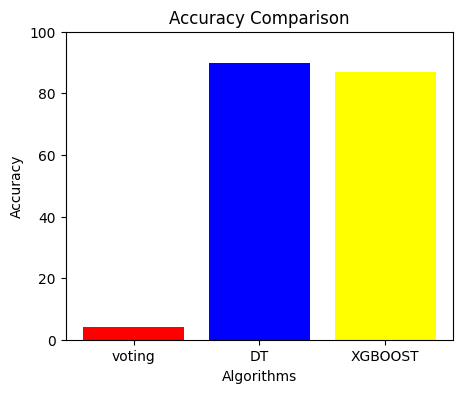

In [ ]:
import matplotlib.pyplot as plt

algorithms=['voting','DT','XGBOOST']
accuracies=[4,90,87] # accuracy we got


#to show the graph difference
plt.figure(figsize=(5,4))
plt.bar(algorithms,accuracies,color=['red','blue','yellow'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0,100)
plt.show()